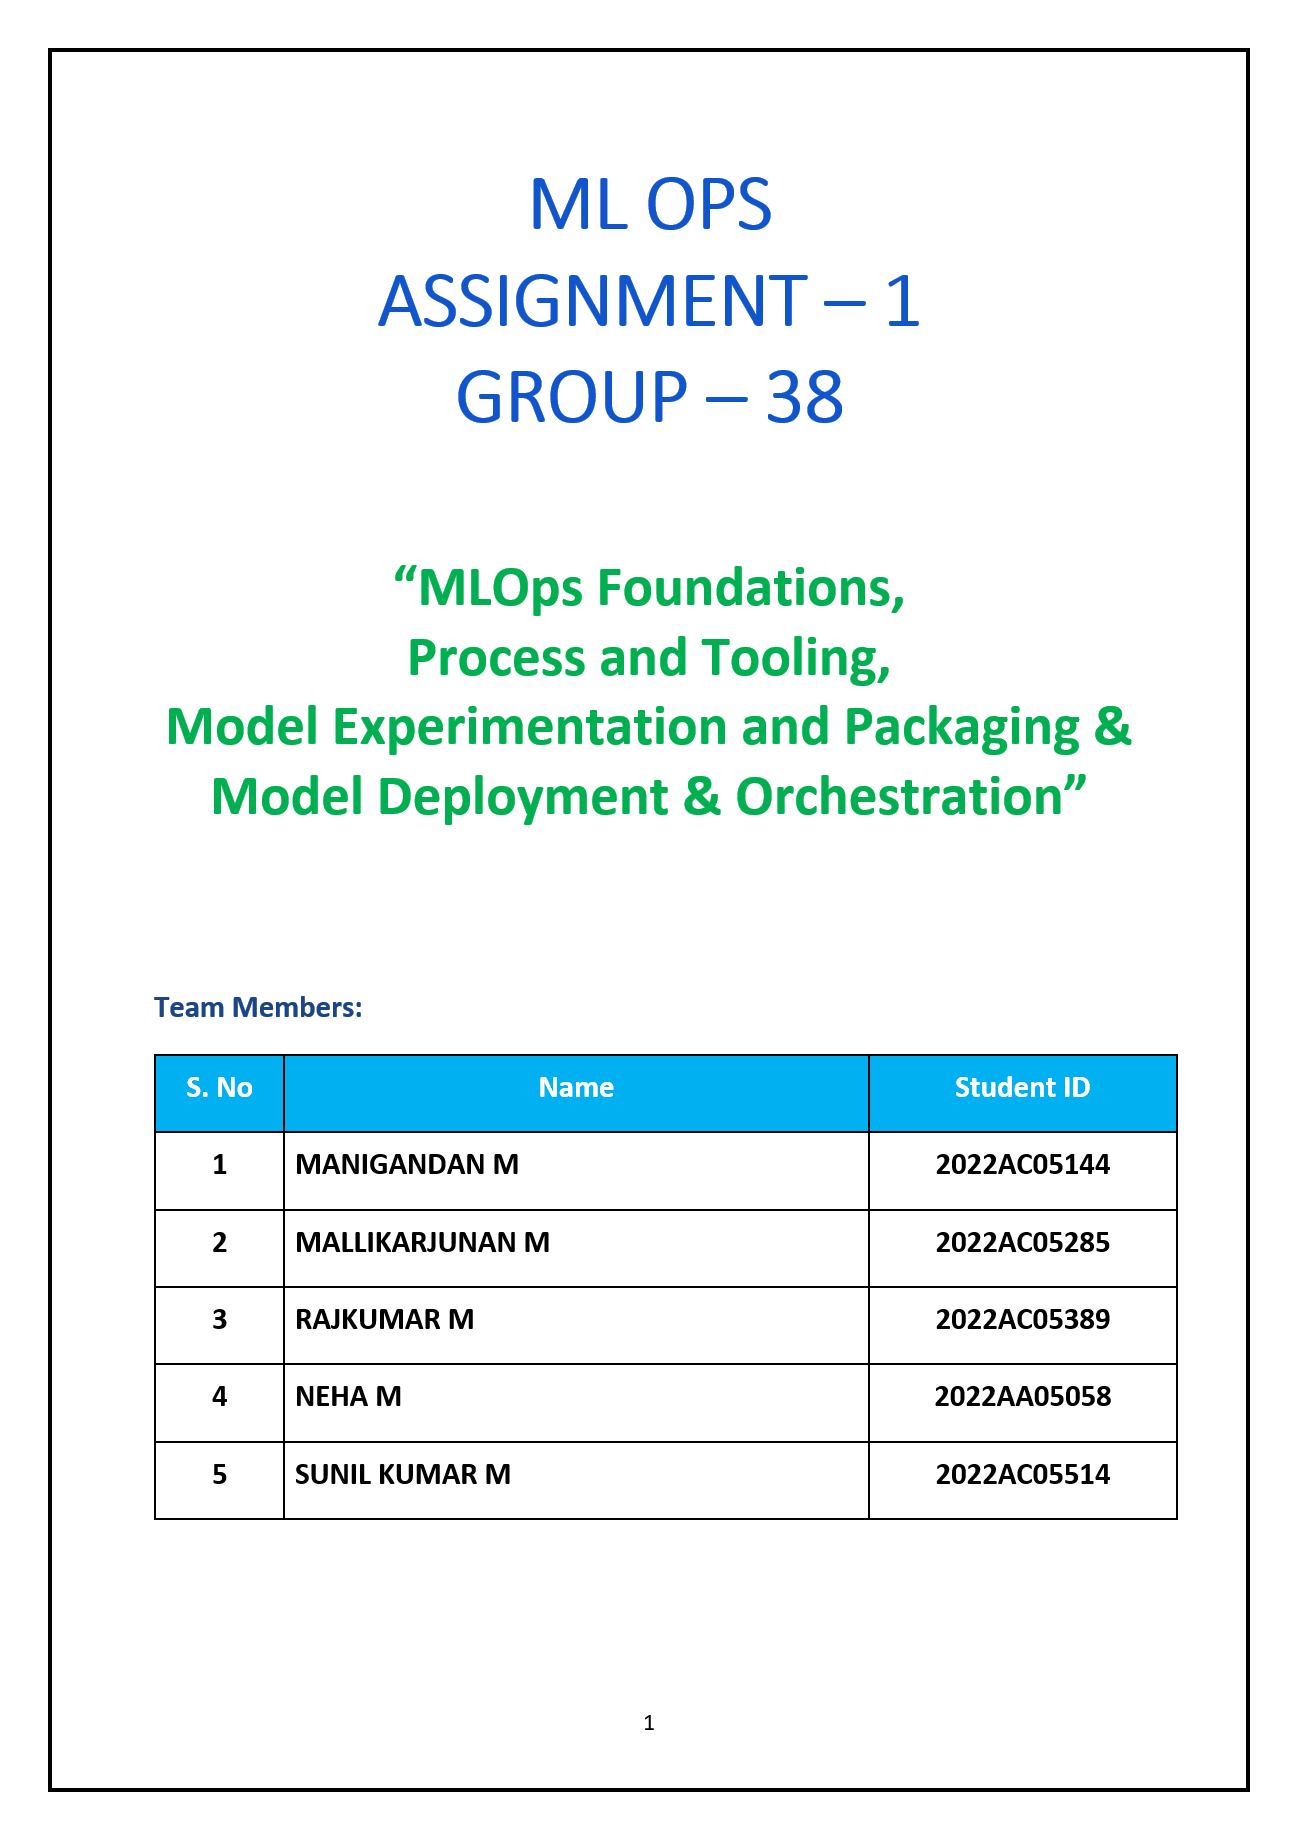

<h1 style="color:green;text-align:center;">MLOPS</h1>

<h2 style="text-align:center;color:green;font-size:18px">ASSIGNMENT - 1</h2>
<h2 style="text-align:center;color:green;font-size:18px">GROUP - 38</h2>
<h2 style="text-align:center;color:green;font-size:18px">Part - M2</h2>
<h3 style="text-align:center;color:green;font-size:18px">“MLOps Foundations, Process and Tooling, Model Experimentation and Packaging & Model Deployment & Orchestration”
</h3>
<hr/>
<h3>Team Members</h3>
<hr/>
<table style="font-size:18px">
    <th style="text-align:center">S.No</th>
    <th style="text-align:center">Name</th>
    <th style="text-align:center">Student ID</th>
    <tr>
        <td style="text-align:left;color:green">1</td>
        <td style="text-align:left;color:green">MALLIKARJUNAN M</td>
        <td style="text-align:left;color:green">2022AC05285</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">2</td>
        <td style="text-align:left;color:green">MANIGANDAN M</td>
        <td style="text-align:left;color:green">2022AC05144</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">3</td>
        <td style="text-align:left;color:green">RAJKUMAR M</td>
        <td style="text-align:left;color:green">2022AC05389</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">4</td>
        <td style="text-align:left;color:green">NEHA M</td>
        <td style="text-align:left;color:green">2022AA05058</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">4</td>
        <td style="text-align:left;color:green">SUNIL KUMAR M</td>
        <td style="text-align:left;color:green">2022AC05514</td>
    </tr>
</table>

<hr/>


<h1 style="color:blue;text-align:center;">Part M2: Implementation</h1> 

<h2 style="color:green">Model Implementation References</h2>
<table style="font-size:18px">
    <tr>
        <td style="text-align:left"><b>Journal Title</b></td>
        <td style="text-align:left;color:green">: PubMed 200k RCT : A Dataset for Sequential Sentence Classification in Medical Abstracts</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Journal Authors</b></td>
        <td style="text-align:left;color:green">: Franck Dernoncourt (dernonco@adobe.com), Ji Young Lee (jjylee@mit.edu)</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Journal Name</b></td>
        <td style="text-align:left;color:green">: arxiv (<a>https://arxiv.org/</a>)</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Year</b></td>
        <td style="text-align:left;color:green">: 17 Oct 2017</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Paper Link</b></td>
        <td style="text-align:left;color:green">: <a>https://arxiv.org/pdf/1710.06071.pdf</a></td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Dataset Link</b></td>
        <td style="text-align:left;color:green">: <a>https://github.com/Franck-Dernoncourt/pubmed-rct</a></td>
    </tr>
</table>

<h1 style="color:green">1. Import the required libraries</h1>

### Importing the required libraries

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-02 16:36:26.558848


In [2]:
import os
import time
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
# Importing required tensorflow dependencies
from tensorflow.keras.layers import TextVectorization

In [5]:
# Plot the model using tensorflow helper function
from tensorflow.keras.utils import plot_model

In [6]:
# Importing tensorflow hub for checking pre-trained models to enable transfer learning
import tensorflow_hub as hub

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [9]:
# Additional dependencies
import random
import string
import time
from sklearn.metrics import confusion_matrix
import itertools

In [10]:
import mlflow
import mlflow.tensorflow

### Confirm access to a GPU

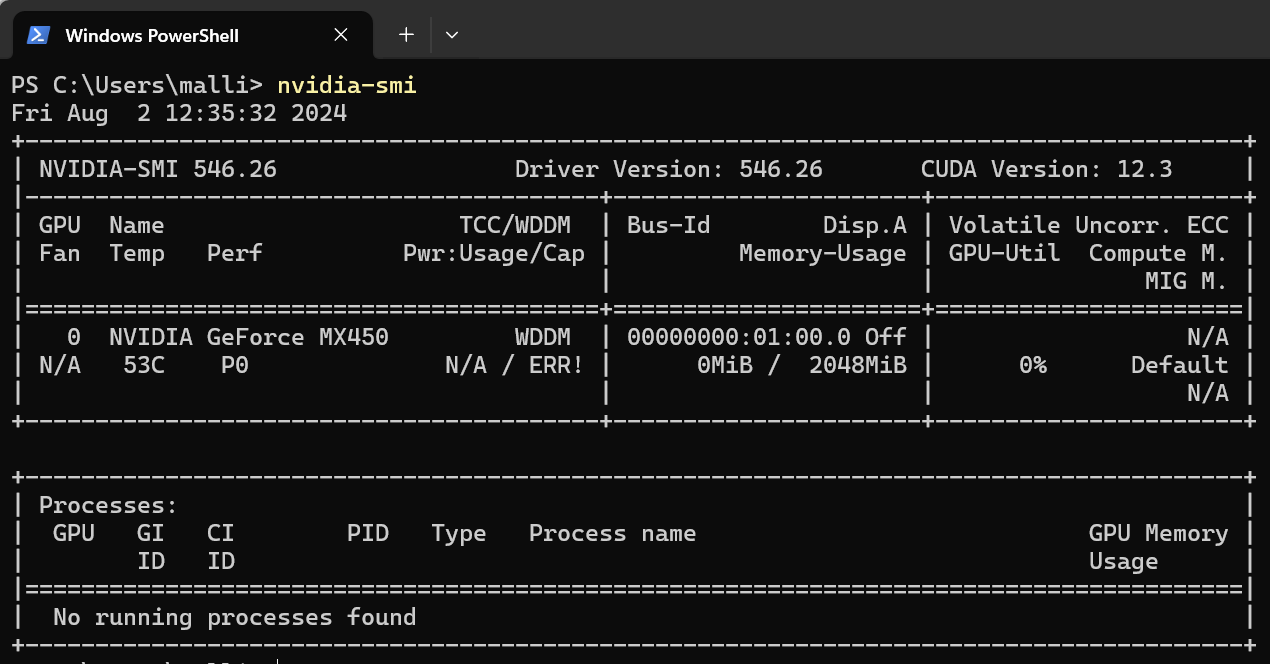

<h1 style="color:green">2. Data Acquisition</h1>

In [11]:
### !git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

In [12]:
%pwd

'C:\\Users\\malli\\Documents\\BITS\\SEM_3\\MLOPS\\ASSIGNMENT_1'

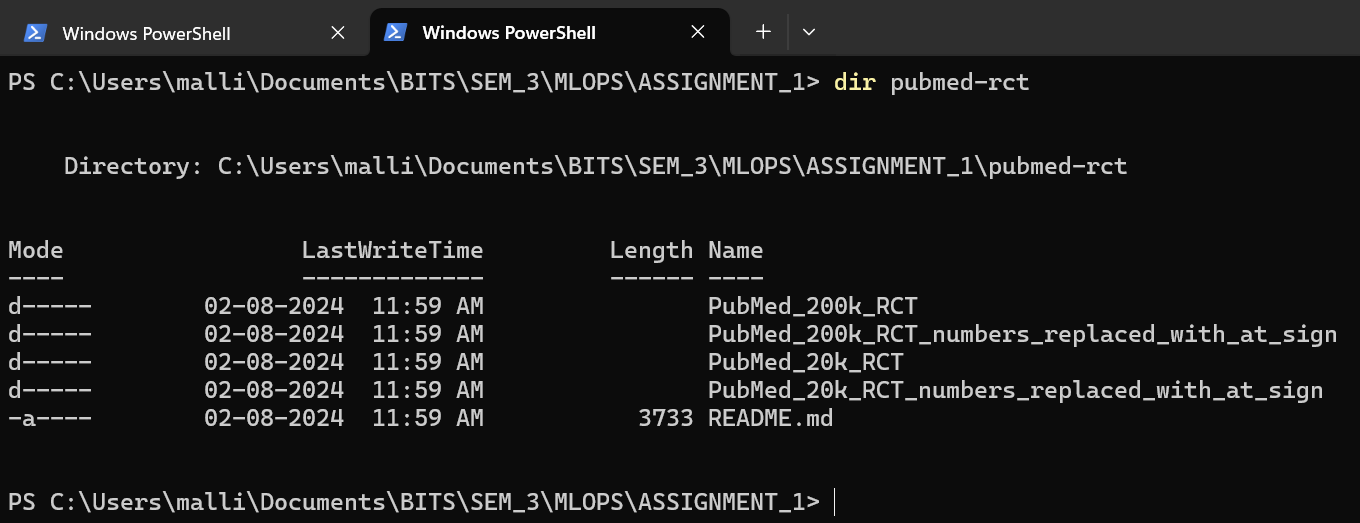

In [13]:
# Starting by using the 20k dataset
data_dir = "pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\"

In [14]:
# Check all of the filenames in the target directory
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\dev.txt',
 'pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\test.txt',
 'pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\train.txt']

<h1 style="color:green">3. Data Preparation</h1>

### Preprocess the data

In [15]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [16]:
train_lines = get_lines(os.path.join(data_dir,"train.txt"))
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [17]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples

In [18]:
# Get data from file and preprocess it
start_time = time.time()
train_samples = preprocess_text_with_line_numbers(os.path.join(data_dir , "train.txt"))
val_samples = preprocess_text_with_line_numbers(os.path.join(data_dir, "dev.txt")) # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(os.path.join(data_dir, "test.txt"))
end_time = time.time()
print(f"Total execution time {end_time-start_time} seconds")
print(f"Training samples :{len(train_samples)}")
print(f"Validation samples :{len(val_samples)}")
print(f"Testing samples :{len(test_samples)}")

Total execution time 0.6429483890533447 seconds
Training samples :180040
Validation samples :30212
Testing samples :30135


In [19]:
# Check the first abstract of our training data
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [20]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [21]:
# Distribution of labels in training data
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

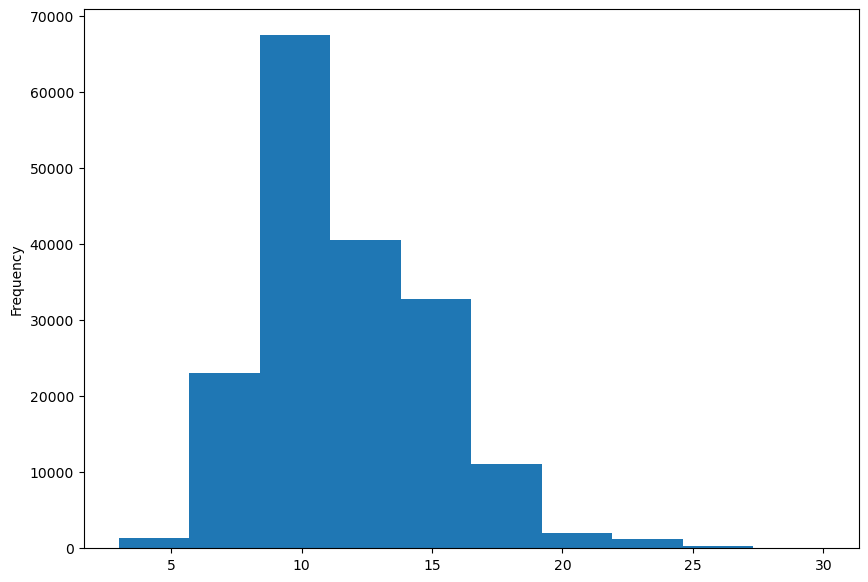

In [22]:
plt.figure(figsize=(10,7))
train_df.total_lines.plot.hist();

### Get lists of sentences

In [23]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [24]:
# View first 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Make numeric labels as our model requires only numerical values

In [25]:
# One hot encode labels
import sklearn
from sklearn.preprocessing import OneHotEncoder

# Check the version of scikit-learn
sklearn_version = sklearn.__version__

# Use the correct parameter based on the version
if sklearn_version >= '0.22':
    one_hot_encoder = OneHotEncoder(sparse_output=False)  # For newer versions
else:
    one_hot_encoder = OneHotEncoder(sparse=False)  # For older versions
# one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label encode labels

In [26]:
# Extract labels ("target" columns) and encode them into integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [27]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

We have completed our pre-processing steps with the above mentioned steps. Now proceeding to the modelling experiments to implement the actual model mentioned in the journal paper

<h1 style="color:green">4. Deep Neural Network Architecture</h1>

<p style="font-size:16px; color: blue"><b>Since it is a complex Deep Neural Network architecture, we are going to breakdown the implementation into series of modelling experiments as shown below. This helps us to track and compare results against various models that we have trained with incremental architecture. We are going to track the experiments mentioned below using MLFlow and add our observations</b></p>
<table style="font-size:16px">
    <tr>
        <td style="text-align:left"><b>Model-1</b></td>
        <td style="text-align:left;color:green">: Conv1D with token embeddings</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Model-2</b></td>
        <td style="text-align:left;color:green">: Conv1D with token embeddings with different hyperparameters</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Model-3</b></td>
        <td style="text-align:left;color:green">: Conv1D with token embeddings with more epochs</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Model-4</b></td>
        <td style="text-align:left;color:green">: Conv1D with token embeddings with different hyperparameters</td>
    </tr>
    <tr>
        <td style="text-align:left"><b>Model-5</b></td>
        <td style="text-align:left;color:green">: Conv1D with token embeddings with different hyperparameters</td>
    </tr>
</table>

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

# Creating small helper functions to plot our model results and other use cases
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  

In [29]:
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [30]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [31]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

<h2 style="color:green">Preparing our data for deep sequence models</h2>

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [34]:
import mlflow
import mlflow.tensorflow

# Sample Epochs and Batch size
epochs = 1
batch_size = "NA"

In [35]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

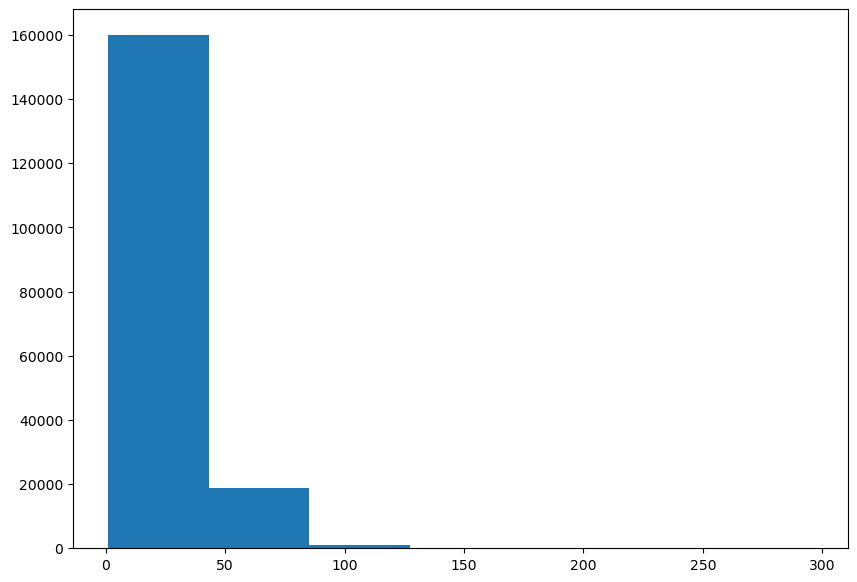

In [36]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(sent_lens, bins=7);

In [37]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [38]:
# Maximum sentence length in the training set
max(sent_lens)

296

<h3 style="color:green">Create text vectorizer</h3>

In [39]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

In [40]:
# Create text vectorizer

# After TensorFlow 2.6
from tensorflow.keras.layers import TextVectorization

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences

In [41]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [42]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
prospective randomized clinical study .

Length of text: 5

Vectorized text:
[[241  29  47  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]


In [43]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [44]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

<h3 style="color:green">Create custom text embedding</h3>

In [45]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
prospective randomized clinical study .

Sentence after vectorization (before embedding):
[[241  29  47  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]

Sentence after embedding:
[[[-0.01801456  0.04942495 -0.01045001 ...  0.02699142 -0.00135616
    0.02753881]
  [-0.02157638  0.04589056 -0.03389291 ...  0.03035808 -0.01440043
   -0.03781025]
  [ 0.03821928  0.02093775 -0.02253634 ...  0.04828488  0.04910714
    0.04323076]
  ...
  [ 0.0451476  -0.00735437  0.04043505 ... -0.04725759  0.04888871
    0.03927401]
  [ 0.0451476  -0.00735437  0.04043505 ... -0.04725759  0.04888871
    0.03927401]
  [ 0.0451476  -0.00735437  0.04043505 ... -0.04725759  0.04888871
    0.03927401]]]

Embedded sentence shape: (1, 55, 128)


### Create datasets (as fast as possible)

The `tf.data` API provides methods which enable faster data loading.

* [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
* [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

The main steps we'll want to use with our data is to turn it into a `PrefetchDataset` of batches.

Doing so we'll ensure TensorFlow loads our data onto the GPU as fast as possible, in turn leading to faster training time.

To create a batched `PrefetchDataset` we can use the methods [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch), the parameter [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE) will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [46]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [47]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

<h1 style="color:green">MLFlow Setup Configuration</h1>

In [48]:
import mlflow

mlflow.set_tracking_uri = "http://127.0.0.1:5000"

# Set an experiment name, which must be unique and case-sensitive.
experiment = mlflow.set_experiment("MLOps Group-38 Assignment-1")
# Get Experiment Details
print(f"Experiment_id: {experiment.experiment_id}")
print(f"Artifact Location: {experiment.artifact_location}")
print(f"Tags: {experiment.tags}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")

Experiment_id: 698681623871822054
Artifact Location: file:///C:/Users/malli/Documents/BITS/SEM_3/MLOPS/ASSIGNMENT_1/mlruns/698681623871822054
Tags: {}
Lifecycle_stage: active


In [49]:
MLFLOW_EXPERIMENT_ID = experiment.experiment_id
MLFLOW_ARTIFACT_LOCATION = experiment.artifact_location

<h2 style="color:green">Model 1: Conv1D with token embeddings</h2>

In [50]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [51]:
# Get summary of Conv1D model
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Directory for saving the model
model_dir = "./mlruns/models"

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

In [53]:
!nvidia-smi

Fri Aug  2 16:36:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX450         WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0              N/A / ERR! |      0MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [54]:
# Autolog most of the parameters
mlflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="model_1"):
    # Log parameters
    # mlflow.log_param("epochs", 3) --> Already logged in autologger
    # mlflow.log_param("batch_size", 32) --> Already logged in autologger
    
    # Fit the model
    model_1_history = model_1.fit(train_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                                  epochs=3,
                                  validation_data=valid_dataset,
                                  validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
    # Log metrics
    accuracy = model_1_history.history['val_accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.tensorflow.log_model(model_1, artifact_path="model_1")

    # Save the model manually to a path
    model_1.save(os.path.join(model_dir, "model_1.h5"))
    mlflow.log_artifact(os.path.join(model_dir, "model_1.h5"), artifact_path="model_1")

    print(f"Logged data and model in run {mlflow.active_run().info.run_uuid}")

2024/08/02 16:36:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/08/02 16:36:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/08/02 16:36:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Epoch 1/3


C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5088 - loss: 1.1855

2024/08/02 16:37:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5090 - loss: 1.1851 - val_accuracy: 0.7410 - val_loss: 0.7000
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7466 - loss: 0.6858

2024/08/02 16:37:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.7466 - loss: 0.6857 - val_accuracy: 0.7696 - val_loss: 0.6251
Epoch 3/3
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7710 - loss: 0.6214

2024/08/02 16:38:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.7711 - loss: 0.6214 - val_accuracy: 0.7919 - val_loss: 0.5888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


2024/08/02 16:38:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/02 16:38:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Logged data and model in run 8bb23f9960e549949faf0fcbf2fa215f


<h2 style="color:green">Model 2: Conv1D token embedding with different hyperparameters (Kernel size as 7)</h2>


In [71]:
# Updating kernel size as 7

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=7, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [72]:
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 55, 64)              │          57,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,357,381 (31.88 MB)

 Trainable params: 8,357,381 (31.88 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train with different kernel size as 7

In [74]:
# Autolog most of the parameters
mlflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="model_2"):
    # Log parameters
    # mlflow.log_param("epochs", 3) --> Already logged in autologger
    # mlflow.log_param("batch_size", 32) --> Already logged in autologger
    
    # Fit the model
    model_2_history = model_2.fit(train_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                                  epochs=3,
                                  validation_data=valid_dataset,
                                  validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
    # Log metrics
    accuracy = model_2_history.history['val_accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.tensorflow.log_model(model_2, artifact_path="model_1")

    # Save the model manually to a path
    model_2.save(os.path.join(model_dir, "model_2.h5"))
    mlflow.log_artifact(os.path.join(model_dir, "model_2.h5"), artifact_path="model_2")

    print(f"Logged data and model in run {mlflow.active_run().info.run_uuid}")

2024/08/02 17:14:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/08/02 17:14:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/08/02 17:14:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Epoch 1/3


C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6862 - loss: 0.8349

2024/08/02 17:14:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6864 - loss: 0.8346 - val_accuracy: 0.7769 - val_loss: 0.6099
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8224 - loss: 0.5020

2024/08/02 17:15:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.8224 - loss: 0.5020 - val_accuracy: 0.7829 - val_loss: 0.6000
Epoch 3/3
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8330 - loss: 0.4677

2024/08/02 17:15:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8330 - loss: 0.4677 - val_accuracy: 0.7912 - val_loss: 0.5877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


2024/08/02 17:15:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/02 17:15:54 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Logged data and model in run 4ba58142722e4eca80a07d8b79af8e29


<h2 style="color:green">Model 3: Conv1D token embedding with different hyperparameters (Kernel size as 5 and with 5 epochs)</h2>

In [75]:
# Updating kernel size as 5 and epochs as 5

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

# Compile
model_3.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [76]:
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Autolog most of the parameters
mlflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="model_3"):
    # Log parameters
    # mlflow.log_param("epochs", 3) --> Already logged in autologger
    # mlflow.log_param("batch_size", 32) --> Already logged in autologger
    
    # Fit the model
    model_3_history = model_3.fit(train_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                                  epochs=5,
                                  validation_data=valid_dataset,
                                  validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
    # Log metrics
    accuracy = model_3_history.history['val_accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.tensorflow.log_model(model_3, artifact_path="model_1")

    # Save the model manually to a path
    model_3.save(os.path.join(model_dir, "model_3.h5"))
    mlflow.log_artifact(os.path.join(model_dir, "model_3.h5"), artifact_path="model_3")

    print(f"Logged data and model in run {mlflow.active_run().info.run_uuid}")

2024/08/02 17:18:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/08/02 17:18:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/08/02 17:18:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Epoch 1/5


C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6994 - loss: 0.8240

2024/08/02 17:18:57 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6997 - loss: 0.8232 - val_accuracy: 0.7832 - val_loss: 0.6071
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8551 - loss: 0.4285

2024/08/02 17:19:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8551 - loss: 0.4285 - val_accuracy: 0.7856 - val_loss: 0.5998
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8699 - loss: 0.3846

2024/08/02 17:19:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.8699 - loss: 0.3846 - val_accuracy: 0.7786 - val_loss: 0.6260
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7808 - loss: 0.6167

2024/08/02 17:20:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.7808 - loss: 0.6166 - val_accuracy: 0.8032 - val_loss: 0.5668
Epoch 5/5
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7906 - loss: 0.5908

2024/08/02 17:20:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7906 - loss: 0.5909 - val_accuracy: 0.7922 - val_loss: 0.5682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


2024/08/02 17:20:40 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/02 17:20:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Logged data and model in run a5b23da35a28404e8f89b5e9e8c5e14a


<h2 style="color:green">Model 4: Conv1D token embedding with different hyperparameters (Kernel size as 5 and with 3 epochs with more dense layers)</h2>

In [78]:
# Updating kernel size as 5 and epochs as 3 with more dense layers in between

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.Conv1D(128, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)

# Compile
model_4.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_4' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [79]:
model_4.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 55, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,382,405 (31.98 MB)

 Trainable params: 8,382,405 (31.98 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Autolog most of the parameters
mlflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="model_4"):
    # Log parameters
    # mlflow.log_param("epochs", 3) --> Already logged in autologger
    # mlflow.log_param("batch_size", 32) --> Already logged in autologger
    
    # Fit the model
    model_4_history = model_4.fit(train_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                                  epochs=3,
                                  validation_data=valid_dataset,
                                  validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
    # Log metrics
    accuracy = model_4_history.history['val_accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.tensorflow.log_model(model_4, artifact_path="model_1")

    # Save the model manually to a path
    model_4.save(os.path.join(model_dir, "model_4.h5"))
    mlflow.log_artifact(os.path.join(model_dir, "model_4.h5"), artifact_path="model_4")

    print(f"Logged data and model in run {mlflow.active_run().info.run_uuid}")

2024/08/02 17:23:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/08/02 17:23:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/08/02 17:23:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Epoch 1/3


C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_4' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7345 - loss: 0.7110

2024/08/02 17:24:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7346 - loss: 0.7107 - val_accuracy: 0.7952 - val_loss: 0.6213
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8742 - loss: 0.3707

2024/08/02 17:24:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8742 - loss: 0.3706 - val_accuracy: 0.7846 - val_loss: 0.6305
Epoch 3/3
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8939 - loss: 0.3244

2024/08/02 17:25:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8939 - loss: 0.3243 - val_accuracy: 0.7653 - val_loss: 0.6962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


2024/08/02 17:25:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/02 17:25:25 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Logged data and model in run fb2f120d1ced4c1687efc56bd589abb5


<h2 style="color:green">Model 5: Conv1D token embedding with different hyperparameters (Kernel size as 5 and with 10 epochs with more dense layers)</h2>

In [81]:
# Updating kernel size as 5 and epochs as 10 with more dense layers in between

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.Conv1D(128, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)

# Compile
model_5.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [82]:
model_5.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 55, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,423,109 (32.13 MB)

 Trainable params: 8,423,109 (32.13 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Autolog most of the parameters
mlflow.autolog()

# Start MLflow run
with mlflow.start_run(run_name="model_5"):
    # Log parameters
    # mlflow.log_param("epochs", 10) --> Already logged in autologger
    # mlflow.log_param("batch_size", 32) --> Already logged in autologger
    
    # Fit the model
    model_5_history = model_5.fit(train_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                                  epochs=10,
                                  validation_data=valid_dataset,
                                  validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
    # Log metrics
    accuracy = model_5_history.history['val_accuracy'][-1]
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.tensorflow.log_model(model_5, artifact_path="model_5")

    # Save the model manually to a path
    model_5.save(os.path.join(model_dir, "model_5.h5"))
    mlflow.log_artifact(os.path.join(model_dir, "model_5.h5"), artifact_path="model_5")

    print(f"Logged data and model in run {mlflow.active_run().info.run_uuid}")

2024/08/02 17:27:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/08/02 17:27:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/08/02 17:27:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Epoch 1/10


C:\Users\malli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:915: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7414 - loss: 0.6815

2024/08/02 17:27:49 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7417 - loss: 0.6808 - val_accuracy: 0.7822 - val_loss: 0.6829
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9009 - loss: 0.3073

2024/08/02 17:28:14 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9009 - loss: 0.3073 - val_accuracy: 0.7729 - val_loss: 0.7337
Epoch 3/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9200 - loss: 0.2571

2024/08/02 17:28:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9200 - loss: 0.2570 - val_accuracy: 0.7600 - val_loss: 0.8110
Epoch 4/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8217 - loss: 0.5035

2024/08/02 17:29:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8217 - loss: 0.5034 - val_accuracy: 0.7936 - val_loss: 0.5666
Epoch 5/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8283 - loss: 0.5037

2024/08/02 17:29:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8283 - loss: 0.5037 - val_accuracy: 0.7896 - val_loss: 0.5807
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7907 - loss: 0.5836

2024/08/02 17:29:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7907 - loss: 0.5836 - val_accuracy: 0.8112 - val_loss: 0.5261
Epoch 7/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8027 - loss: 0.5431

2024/08/02 17:30:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8027 - loss: 0.5432 - val_accuracy: 0.8068 - val_loss: 0.5248
Epoch 8/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8109 - loss: 0.5345

2024/08/02 17:30:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.8109 - loss: 0.5345 - val_accuracy: 0.8068 - val_loss: 0.5411
Epoch 9/10
561/562 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8106 - loss: 0.5280

2024/08/02 17:31:11 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.8106 - loss: 0.5279 - val_accuracy: 0.8095 - val_loss: 0.5570
Epoch 10/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8033 - loss: 0.5408

2024/08/02 17:31:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'str' object is not callable


562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.8033 - loss: 0.5408 - val_accuracy: 0.7975 - val_loss: 0.5339


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


2024/08/02 17:31:45 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/02 17:31:53 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Logged data and model in run 1e87ff50423e42898c7b60eb9230991b


<h1 style="color:blue;text-align:center;">Part M2: DVC Implementation</h1> 

<h2 style="color:green">Data Versioning</h2>

- Use DVC (Data Version Control) to version control a dataset used in your project.
- Show how to revert to a previous version of the dataset.


### Setting Up DVC for Data Versioning

1. **Install DVC:**
   - Ensure you have DVC installed:
     ```bash
     pip install dvc
     ```

2. **Initialize DVC in Your Project:**
   - Initialize a DVC repository:
     ```bash
     dvc init
     ```

3. **Add Your Dataset to DVC:**
   - Track your dataset with DVC:
     ```bash
     dvc add C:\Users\malli\Documents\BITS\SEM_3\MLOPS\ASSIGNMENT_1\pubmed-rct
     ```

   - This will create a `.dvc` file (e.g., `dataset.dvc`). We should Commit this file to our version control system (e.g., Git):
     ```bash
     git add dataset.dvc .gitignore
     git commit -m "Add dataset to DVC"
     ```

4. **Push the Dataset to Remote Storage (Optional):**
   - Configure a remote storage (e.g., Amazon S3, Google Cloud Storage) --> For demonstration we have chosen local storage:
     ```bash
     dvc remote add -d myremote C:\Users\malli\Documents\BITS\SEM_3\MLOPS\DVC_Storage -d
     dvc push
     ```

### Reverting to a Previous Version of the Dataset

1. **Commit Changes:**
   - Make sure your dataset changes are committed:
     ```bash
     git commit -m "Updated dataset with the changes"
     dvc push
     ```

2. **Revert to a Previous Version:**
   - To revert to a previous version of the dataset, checkout the previous Git commit and update DVC:
     ```bash
     git checkout <commit_hash>
     dvc checkout
     ```


<h1 style="color:green;text-align:center;">MLOPS</h1>

<h2 style="text-align:center;color:green;font-size:18px">ASSIGNMENT - 1</h2>
<h2 style="text-align:center;color:green;font-size:18px">GROUP - 38</h2>
<h3 style="text-align:center;color:green;font-size:18px">“MLOps Foundations, Process and Tooling, Model Experimentation and Packaging & Model Deployment & Orchestration”
</h3>
<hr/>
<h3>Team Members</h3>
<hr/>
<table style="font-size:18px">
    <th style="text-align:center">S.No</th>
    <th style="text-align:center">Name</th>
    <th style="text-align:center">Student ID</th>
    <tr>
        <td style="text-align:left;color:green">1</td>
        <td style="text-align:left;color:green">MALLIKARJUNAN M</td>
        <td style="text-align:left;color:green">2022AC05285</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">2</td>
        <td style="text-align:left;color:green">MANIGANDAN M</td>
        <td style="text-align:left;color:green">2022AC05144</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">3</td>
        <td style="text-align:left;color:green">RAJKUMAR M</td>
        <td style="text-align:left;color:green">2022AC05389</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">4</td>
        <td style="text-align:left;color:green">NEHA M</td>
        <td style="text-align:left;color:green">2022AA05058</td>
    </tr>
    <tr>
        <td style="text-align:left;color:green">4</td>
        <td style="text-align:left;color:green">SUNIL KUMAR M</td>
        <td style="text-align:left;color:green">2022AC05514</td>
    </tr>
</table>

<hr/>
